In [36]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [37]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [38]:
def process_values(state:AgentState)->AgentState:
    """This process handles multiple different inputs."""
    print(state)
    state['result']= f"Hi {state['name']}!! Your sum = {sum(state['values'])}"
    print(state)
    return state

In [39]:
graph = StateGraph(AgentState)
graph.add_node("processor",process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app=graph.compile()

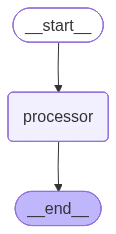

In [40]:
display(Image(app.get_graph().draw_mermaid_png()))

In [41]:
results=app.invoke({"values":[1,4,2,7,245],"name":"Yash"})
print("Final Results:",results)

{'values': [1, 4, 2, 7, 245], 'name': 'Yash'}
{'values': [1, 4, 2, 7, 245], 'name': 'Yash', 'result': 'Hi Yash!! Your sum = 259'}
Final Results: {'values': [1, 4, 2, 7, 245], 'name': 'Yash', 'result': 'Hi Yash!! Your sum = 259'}


In [42]:
print(results['result'])

Hi Yash!! Your sum = 259


In [43]:
class AgentState2(TypedDict):
    numbers: List[float]
    name: str
    operation: str
    result: str

In [44]:
def perform_operation(state:AgentState2)->AgentState2:
    """This process performs an operation on the numbers."""
    print(state)
    if state['operation']=='+':
        res=sum(state['numbers'])
    elif state['operation']=='*':
        res=1
        for num in state['numbers']:
            res*=num
    else:
        res=None
    state['result']= f"Hi {state['name']}!! The {state['operation']} of all the numbersis {res}"
    print(state)
    
    return state

In [45]:
graph2 = StateGraph(AgentState2)
graph2.add_node("operator",perform_operation)
graph2.set_entry_point("operator")
graph2.set_finish_point("operator")
app2=graph2.compile()

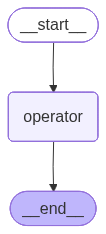

In [46]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [47]:
results2=app2.invoke({"numbers":[12.43,242.43,1235,5.5123],"name":"Holden","operation":"*"})
print("Final Results:",results2)

{'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '*'}
{'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '*', 'result': 'Hi Holden!! The * of all the numbersis 20514327.910383448'}
Final Results: {'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '*', 'result': 'Hi Holden!! The * of all the numbersis 20514327.910383448'}


In [48]:
results3=app2.invoke({"numbers":[12.43,242.43,1235,5.5123],"name":"Holden","operation":"+"})
print("Final Results:",results3)

{'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '+'}
{'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '+', 'result': 'Hi Holden!! The + of all the numbersis 1495.3723000000002'}
Final Results: {'numbers': [12.43, 242.43, 1235, 5.5123], 'name': 'Holden', 'operation': '+', 'result': 'Hi Holden!! The + of all the numbersis 1495.3723000000002'}


In [49]:
print(results2['result'])
print(results3['result'])

Hi Holden!! The * of all the numbersis 20514327.910383448
Hi Holden!! The + of all the numbersis 1495.3723000000002
